In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from psl.coupled_systems import *

# Thermal RC Network

In [2]:
#RC Network
adj = np.array([[0,1],[0,2],[0,3],[1,0],[1,3],[1,4],[2,0],[2,3],[3,0],[3,1],[3,2],[3,4],[4,1],[4,3]]).T
network = RC_Network(nsim=10000, nx=5, adj=adj)
x0 = (np.random.rand(5) * (10)) + 273
sim = network.simulate(x0=x0, show_progress=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

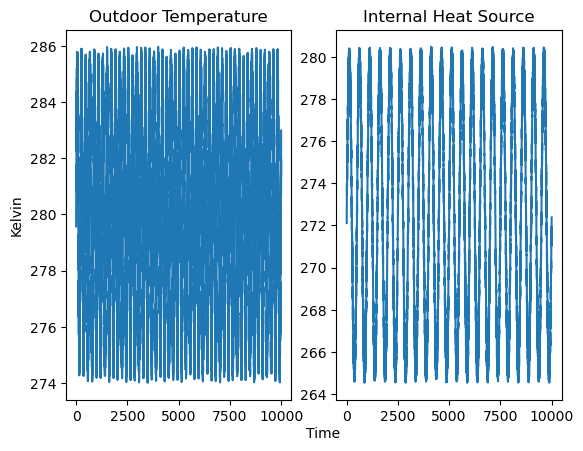

In [3]:
fig, ax = plt.subplots(1,2)
fig.text(0.5, 0.03, 'Time')
ax=ax.flatten()
ax[0].plot(network.U[:,0])
ax[0].set_title('Outdoor Temperature')
ax[0].set_ylabel('Kelvin')
ax[1].plot(network.U[:,1])
ax[1].set_title('Internal Heat Source');

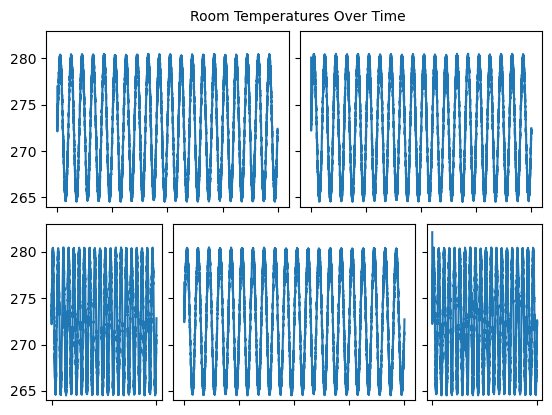

In [4]:
fig = plt.figure()
fig.text(0.35, 0.9, 'Room Temperatures Over Time')
locs = [(0,0),(0,2),(1,0),(1,1),(1,3)]
spans = [2,2,1,2,1]
ax = [plt.subplot2grid((2,4), l, colspan=s) for l,s in zip(locs, spans)]
[ax[i].plot(sim['X'][:,i]) for i in range(len(locs))];
miny = np.floor(np.min(sim['X']))
maxy = np.ceil(np.max(sim['X']))
[a.set_ylim(miny, maxy) for a in ax]
[a.tick_params(labelbottom=False) for a in ax]
[ax[i].tick_params(labelleft=False) for i in [1,3,4]]
fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

# Gravitational System

In [5]:
#adj = np.array([[0,1],[0,2],[0,3],[1,0],[2,0],[3,0]]).T #
nsim = 10000
network = Gravitational_System(G=6.67e-11, nx=4)
ninit = np.array([[1000000, 0, 0, 0, 0],
         [1, 1, 0, 0, 8.167e-3],
         [1, 0, 2, 4.0835e-3, 0],
         [1, -1, -1, 4e-3, -4e-3]])
Sim = network.simulate(nsim=nsim, x0=ninit, show_progress=True)
sim=Sim['Y']

  0%|          | 0/10000 [00:00<?, ?it/s]

In [6]:
%%capture
fig, ax = plt.subplots()
ax.set_xlim(-2.2,2.2)
ax.set_xticks([])
ax.set_ylim(-2.2,2.2)
ax.set_yticks([])
colors = ['red','blue','orange','green']
ax.scatter([0], [0], c=colors[0])
pts = [ax.plot([],[], c=colors[i], alpha=0.5) for i in range(1,sim.shape[1])]
scts = [ax.scatter(sim[0,i,1], sim[0,i,2], c=colors[i]) for i in range(1,sim.shape[1])]

In [7]:
def drawframe(n):
    start = np.minimum(n - 10,0)
    end = n
    for i in range(3):
        scts[i].set_offsets(sim[end, i+1, [1,2]])
        pts[i][0].set_data(sim[start:end, i+1, 1], sim[start:end, i+1, 2])
    return pts 

In [8]:
anim = FuncAnimation(fig, drawframe, frames=np.arange(0, nsim, 10), interval=5, blit=True)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

# Boid's System

In [ ]:
nx=50
nsim=2000
network = Boids(nx=nx, visual_range = 0.3)
pos_init = np.random.rand(nx,2) * 3 + np.array([[3,1]])
vel_init = np.random.rand(nx,2) * 0.06
x0 = np.hstack([pos_init,vel_init])
sim = network.simulate(x0 = x0, nsim=nsim, show_progress=True)

  0%|          | 0/1999 [00:00<?, ?it/s]

In [ ]:
%%capture
fig, ax = plt.subplots()
ax.set_xlim(0,10)
ax.set_ylim(0,10)
pos=sim['Y']
scatters = ax.scatter(pos[0,:,0], pos[0,:,1], s=4)

In [ ]:
def drawframe(n):
    scatters.set_offsets(pos[n,:,:2])

In [ ]:
anim = FuncAnimation(fig, drawframe, frames=np.arange(0, nsim), interval=20, blit=True)
HTML(anim.to_html5_video())